# (f) Use SMOTE to compensate for class imbalance
The 5-fold cross validation to estimate the error of the trained model is in Tree-Based Methods.ipynb

In [8]:
cls_sm = Classifier(classname='weka.classifiers.trees.LMT', options=['-I' ,'1'])
loader = Loader(classname='weka.core.converters.ArffLoader')
sm_data = loader.load_file('SMOTE_train_data.arff')
sm_data.class_is_last()

In [9]:
print("start build")
cls_sm.build_classifier(sm_data)
print("end build")

s_train_pred = []
s_train_prob = []
s_test_pred = []
s_test_prob = []
s_train_label = []
s_test_label = []
for i in sm_data:
    s_train_pred.append(cls_sm.classify_instance(i))
    s_train_prob.append(cls_sm.distribution_for_instance(i))
    if list(i)[-1]=='neg':
        s_train_label.append(0)
    else:
        s_train_label.append(1)

for i in test_data:
    s_test_pred.append(cls_sm.classify_instance(i))
    s_test_prob.append(cls_sm.distribution_for_instance(i))

start build
end build


For training set:
The confusion matrix is:
[[58848   152]
 [   29 58971]]
AUC and ROC:
AUC is 0.9995846230968113
The misclassification rate is: 0.0015338983050847688


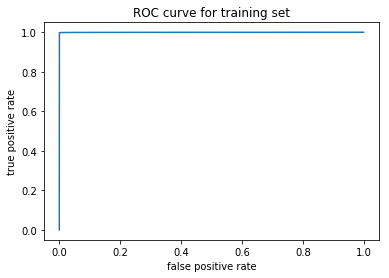

In [10]:
s_train_prob = np.array(s_train_prob)

print('For training set:')
print('The confusion matrix is:')
print(metrics.confusion_matrix(s_train_label, s_train_pred))

print('AUC and ROC:')
fpr, tpr, thresholds = metrics.roc_curve(s_train_label, s_train_prob[:,0], pos_label=0)
print('AUC is', metrics.auc(fpr,tpr))

plt.title('ROC curve for training set')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr,tpr)

print("The misclassification rate is:", 1-accuracy_score(s_train_label, s_train_pred))

For test set:
The confusion matrix is:
[[15124   501]
 [   78   297]]
AUC and ROC:
AUC is 0.9641065813333333
The misclassification rate is: 0.03618750000000004


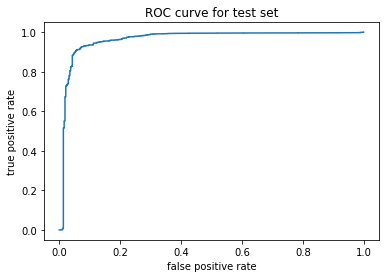

In [11]:
s_test_prob = np.array(s_test_prob)
print('For test set:')

print('The confusion matrix is:')
print(metrics.confusion_matrix(test_label, s_test_pred))

print('AUC and ROC:')
fpr, tpr, thresholds = metrics.roc_curve(test_label, s_test_prob[:,0], pos_label=0)
print('AUC is',metrics.auc(fpr,tpr))

plt.title('ROC curve for test set')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr,tpr)

print('The misclassification rate is:', 1-accuracy_score(test_label, s_test_pred))